In [50]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from dateutil import parser
from tqdm import tqdm

import pandas as pd
import numpy as np

base_link = "https://bitcointalk.org/index.php?board=159."

response = urlopen(base_link + "0")
html = response.read()
soup = BeautifulSoup(html, 'html.parser')

max_page = int(list(soup.find(id="toppages"))[-3].text)

d = list()

for i in tqdm(range(max_page)):
    link = base_link + str(i)
    response = urlopen(link)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')    
    
    for res in soup.find_all('a'):
        if "ANN" in res.text:
            d.append({"links":res.get('href'), "text" : res.text, "date" : 0})

df = pd.DataFrame(data=d)

print(df.head())
    


100%|██████████| 322/322 [16:29<00:00,  3.39s/it]

                                               links  \
0  https://bitcointalk.org/index.php?topic=2116446.0   
1  https://bitcointalk.org/index.php?topic=2006999.0   
2  https://bitcointalk.org/index.php?topic=2144082.0   
3  https://bitcointalk.org/index.php?topic=2133048.0   
4  https://bitcointalk.org/index.php?topic=2056867.0   

                                                text  
0  [ANN] [SDRN] Senderon - ERC23 Project Funding ...  
1  [ANN] STORM Token: A Gamified Micro-Task Marke...  
2      ANN: ELIXIR (ELIX) Incentives Driven Payments  
3  [ ANN ][ VSX ] - Masternode - POS 3.0 - Seesaw...  
4  ▉ANN▉ Masternodecoin  ▉▉▉▉░  2nd Airdrop  ░▉▉▉...  


AttributeError: 'DataFrame' object has no attribute 'link'

In [85]:
for i in tqdm(range(len(df.links))):
    if df.xs(i)['date'] == 0:
        link = df.xs(i)['links']
        response = urlopen(link)
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        try:
            dt = parser.parse(soup.find_all('span', {'class' : 'edited'})[0].text)
            df.set_value(i, 'date', dt)
        except:
            try:
                dt = parser.parse(soup.find_all("div",{'class' : 'smalltext'})[1].text)
                df.set_value(i, 'date', dt)
            except:
                continue
    if i%100==0:
        df.to_csv('links.txt', header=True, index=False, sep='\t')
            
print(df.tail())


100%|██████████| 10142/10142 [00:07<00:00, 1325.02it/s]

                                                   links  \
10137  https://bitcointalk.org/index.php?topic=1945661.0   
10138  https://bitcointalk.org/index.php?topic=2029634.0   
10139  https://bitcointalk.org/index.php?topic=2046828.0   
10140  https://bitcointalk.org/index.php?topic=2153185.0   
10141  https://bitcointalk.org/index.php?topic=2152924.0   

                                                    text                 date  
10137  [ANN] FUCKTOKEN - Proof of Fuck Given [FUCK] -...  2017-06-02 13:54:40  
10138      [ANN][Soar] SOARCOIN - Your new digital cash!  2017-07-18 14:06:58  
10139  ❤❤❤[ANN] [ICO] JDS ICO is open (AIRDROP  ❤10,0...  2017-07-26 07:51:29  
10140  [ANN] Tokenlab - Token & ICO as a Service [Sal...  2017-09-05 16:04:06  
10141  [ANN][ICO] SHARESTATE - CRYPTOCURRENCY BACKED ...  2017-09-05 14:14:24  


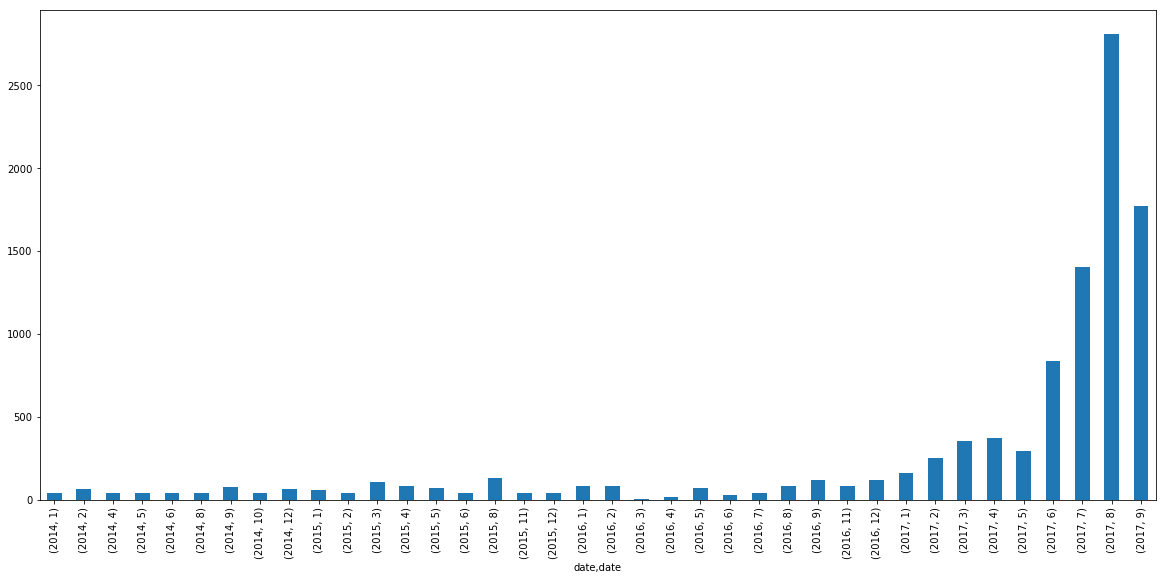

In [117]:
import matplotlib.pyplot as plt
df[df["date"].dt.year > 2013]["date"].groupby((df["date"].dt.year, df["date"].dt.month)).count().plot(kind="bar")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()